# Homework 4 Assignment 2: 

Directions from Dr. Bianco : https://github.com/fedhere/PUI2018_fb55/tree/master/HW4_fb55

Formulate a question, null and alternative hypothesis for a CitiBike dataset that our team would like to investigate. Use pandas to read in the dataframe within the notebook and more it to the $PUIDATA folder. Display and plot the data. 


## Idea/Question and Hypothesis

### Idea/Question
Citibike users are more likely to ride bikes on Saturdays than Sundays.

### Null Hypothesis
The proportion of bike trips on Saturdays are the same or less than the proportion of bike trips on Sundays per week.

_$H_0$ : $\frac{Saturday_{\mathrm{NumberOfTrips}}}{Week_{\mathrm{totalTrips}}} <= \frac{Sundays_{\mathrm{NumberOfTrips}}}{Week_{\mathrm{totalTrips}}}$

_$H_1$ : $\frac{Sundays_{\mathrm{NumberOfTrips}}}{Week_{\mathrm{totalTrips}}} > \frac{Sundays_{\mathrm{NumberOfTrips}}}{Week_{\mathrm{totalTrips}}}$

using a significance level of α = 0.05

In [1]:
# import the necessary libraries for this analysis.
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# PUIDATA environmental variable
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME") ## force the PUIdata variable

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yg833/PUI2018/PUIdata


Credit goes to Dr. Bianco's (@fedhere) sample citibikes_gender.ipynb for the function to pull citibikes data set and move into PUIDATA folder
https://github.com/fedhere/PUI2018_fb55/blob/master/HW4_fb55/citibikes_gender.ipynb 

In [4]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as string and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201606'
getCitiBikeCSV(datestring)
# Check the file and it is a zip file
# running this code for the first time only downloads the zip file. 
# ran the code 2nd time to ensure that the file is in place and is unzipped

file in place, you can continue


In [6]:
# read in the citibike data for June 2016
citidf = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [7]:
# render the first 10 obs of the citibikes dataframe
citidf.head(5)

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.993800   19859  Subscriber      1972.0       1  
1             -73.957824   16233  Subscriber      1967.0       1  
2             -73.982681   22397  Subscriber      1989.0       1  
3             -73.989978   16231  Subscriber      1991.0       1  
4             -73.990741   15400  Subscriber      1989.0       1

In [80]:
# check for the column names
citidf.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'weekdaynum', 'weekday',
       'cleaned_date'],
      dtype='object')

In [11]:
# create a date variable that is formatted into pandas format %Y-%m-%d hh:mm:ss
citidf['date'] = pd.to_datetime(citidf['starttime'])

# find the week day number 0 for Monday - 6 for Sunday
citidf['weekdaynum'] = citidf['date'].apply(lambda x: x.weekday())

In [12]:
# Check the new date columns
citidf.head(5)

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   

                 date  weekdaynum  
0 2016-06-01 00:00:18           2  
1 2016-06-01 00:00:20           2  
2 2016-06-01 00:00:21           2  
3 2016-06-01 00:00:28           2  
4 2016-06-01 00:00:53           2

In [13]:
# using a dictionary to map week num to week day name
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

citidf['weekday'] = citidf['weekdaynum'].apply(lambda x : days[x] )

In [14]:
# Check the new date columns
citidf.head(5)

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   

                 date  weekdaynum weekday  
0 2016-06-01 00:00:18           2    Weds  
1 2016-06-01 00:00:20           2    Weds  
2 2016-06-01 00:00:21           2    Weds  
3 2016-06-01 00:00:28           2    Weds  
4 2016-06-01 00:00:53           2    Weds

In [15]:
# inspect for the counts per weekday
citidf['weekday'].value_counts()

Weds     262595
Thurs    261553
Tues     209782
Fri      200696
Mon      200488
Sat      173908
Sun      151296
Name: weekday, dtype: int64

In [17]:
# strip the time stamp and only retain the date value
citidf['cleaned_date'] = citidf['date'].apply(lambda x: x.date())

In [18]:
# Check the new date columns
citidf.head(5)

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   

                 date  weekdaynum weekday cleaned_date  
0 2016-06-01 00:00:18           2    Weds   2016-06-01  
1 2016-06-01 00:00:20           2    Weds   2016-06-01  
2 2016-06-01 00:00:21           2    Weds   2016-06-01  
3 2016-06-01 00:00:28           2    Weds   2016-06-01  
4 2016-06-01 00:00:53           2    Weds   2016-06-01

In [22]:
# do counts grouped by day of week
pd.DataFrame(citidf[[ 'weekdaynum','weekday', 'cleaned_date']].groupby(['weekdaynum', 'weekday', 'cleaned_date']).size())

0
weekdaynum weekday cleaned_date       
0          Mon     2016-06-06    52149
                   2016-06-13    49069
                   2016-06-20    52247
                   2016-06-27    47023
1          Tues    2016-06-07    51812
                   2016-06-14    54813
                   2016-06-21    53564
                   2016-06-28    49593
2          Weds    2016-06-01    54665
                   2016-06-08    42250
                   2016-06-15    55049
                   2016-06-22    55749
                   2016-06-29    54882
3          Thurs   2016-06-02    54401
                   2016-06-09    52905
                   2016-06-16    46198
                   2016-06-23    53206
                   2016-06-30    54843
4          Fri     2016-06-03    38975
                   2016-06-10    53299
                   2016-06-17    54236
                   2016-06-24    54186
5          Sat     2016-06-04    40977
                   2016-06-11    41030
                   2016-06-18    48901
                   2016-06-25    43000
6          Sun     2016-06-05    22397
                   2016-06-12    40637
                   2016-06-19    45270
                   2016-06-26    42992

In [24]:
# pull out a new df that is just the weekday and the cleaned dates
citidf_2 = citidf[['weekday', 'cleaned_date']]

In [25]:
# check the new df

citidf_2.head(5)

weekday cleaned_date
0    Weds   2016-06-01
1    Weds   2016-06-01
2    Weds   2016-06-01
3    Weds   2016-06-01
4    Weds   2016-06-01

In [27]:
# do the counts per date
citidf_2['cleaned_date'].value_counts()

2016-06-22    55749
2016-06-15    55049
2016-06-29    54882
2016-06-30    54843
2016-06-14    54813
2016-06-01    54665
2016-06-02    54401
2016-06-17    54236
2016-06-24    54186
2016-06-21    53564
2016-06-10    53299
2016-06-23    53206
2016-06-09    52905
2016-06-20    52247
2016-06-06    52149
2016-06-07    51812
2016-06-28    49593
2016-06-13    49069
2016-06-18    48901
2016-06-27    47023
2016-06-16    46198
2016-06-19    45270
2016-06-25    43000
2016-06-26    42992
2016-06-08    42250
2016-06-11    41030
2016-06-04    40977
2016-06-12    40637
2016-06-03    38975
2016-06-05    22397
Name: cleaned_date, dtype: int64

In [58]:
citidf_2_graph = pd.DataFrame(citidf_2.groupby(['cleaned_date', 'weekday']).size().reset_index(name='counts'))

In [79]:
citidf_2_graph

cleaned_date weekday  counts
0    2016-06-01    Weds   54665
1    2016-06-02   Thurs   54401
2    2016-06-03     Fri   38975
3    2016-06-04     Sat   40977
4    2016-06-05     Sun   22397
5    2016-06-06     Mon   52149
6    2016-06-07    Tues   51812
7    2016-06-08    Weds   42250
8    2016-06-09   Thurs   52905
9    2016-06-10     Fri   53299
10   2016-06-11     Sat   41030
11   2016-06-12     Sun   40637
12   2016-06-13     Mon   49069
13   2016-06-14    Tues   54813
14   2016-06-15    Weds   55049
15   2016-06-16   Thurs   46198
16   2016-06-17     Fri   54236
17   2016-06-18     Sat   48901
18   2016-06-19     Sun   45270
19   2016-06-20     Mon   52247
20   2016-06-21    Tues   53564
21   2016-06-22    Weds   55749
22   2016-06-23   Thurs   53206
23   2016-06-24     Fri   54186
24   2016-06-25     Sat   43000
25   2016-06-26     Sun   42992
26   2016-06-27     Mon   47023
27   2016-06-28    Tues   49593
28   2016-06-29    Weds   54882
29   2016-06-30   Thurs   54843

Text(0.5,0,'Dates in June 2016')

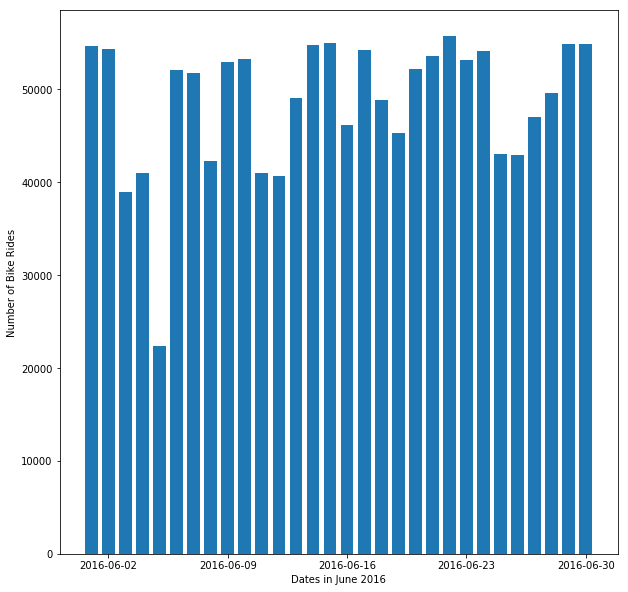

In [68]:
pl.figure(figsize = (10,10))
ax = pl.subplot(111)
ax.bar(citidf_2_graph['cleaned_date'], citidf_2_graph['counts'], width = .75)
ax.xaxis_date()
pl.ylabel('Number of Bike Rides')
pl.xlabel('Dates in June 2016')

Figure 1: Number of Bike Rides Per Day in June 2016, bar chart, counts

Text(0.5,0,'Dates in June 2016')

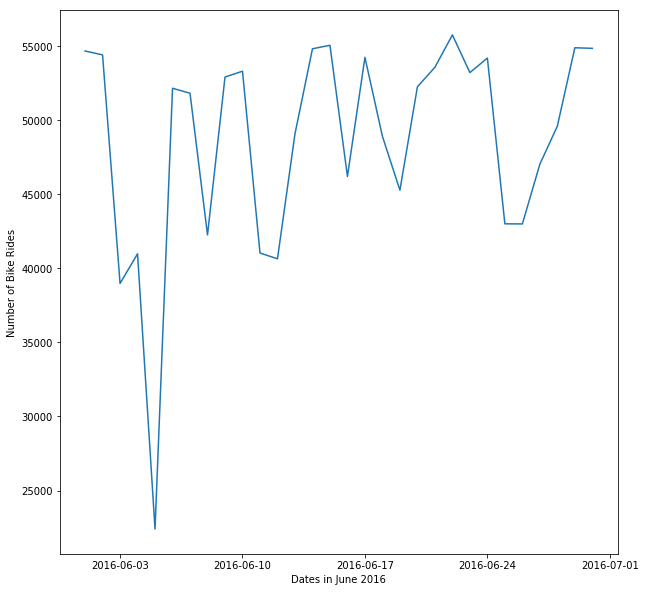

In [74]:
pl.figure(figsize = (10,10))
ax = pl.subplot(111)
ax.plot(citidf_2_graph['cleaned_date'], citidf_2_graph['counts'])
ax.xaxis_date()
pl.ylabel('Number of Bike Rides')
pl.xlabel('Dates in June 2016')

Figure 2: Line graph of the Number of Rides Per Day in June 2016

In [81]:
# drop the columns dont need for this
citidf.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid','usertype' ,'gender',
       'birth year'], axis=1, inplace=True)

In [82]:
citidf.head(5)

date  weekdaynum weekday cleaned_date
0 2016-06-01 00:00:18           2    Weds   2016-06-01
1 2016-06-01 00:00:20           2    Weds   2016-06-01
2 2016-06-01 00:00:21           2    Weds   2016-06-01
3 2016-06-01 00:00:28           2    Weds   2016-06-01
4 2016-06-01 00:00:53           2    Weds   2016-06-01